**Análisis de Ventas de Productos con Descuentos Estacionales**

**Enunciado:**

Eres analista de datos en una empresa que vende varios productos.  Tienes datos históricos de ventas que incluyen:

*   **ID del Producto:** Un identificador único para cada producto.
*   **Fecha de Venta:** La fecha en que se realizó la venta.
*   **Cantidad Vendida:**  El número de unidades vendidas en esa transacción.
*   **Precio Unitario:** El precio normal del producto.
*   **Descuento Aplicado:** El porcentaje de descuento aplicado en esa venta (puede ser 0).

La empresa realiza descuentos estacionales. Quieres analizar cómo los descuentos afectan las ventas y visualizar las tendencias.

1.  **Generación de Datos Simulados (NumPy y Pandas):**
    *   Crea un DataFrame de Pandas con datos simulados para 1 año (365 días).
    *   Genera datos para al menos 5 productos diferentes.
    *   Simula descuentos estacionales: por ejemplo, mayores descuentos en verano (junio-agosto) y menores en invierno (diciembre-febrero).  Usa distribuciones de probabilidad (por ejemplo, `np.random.choice` con diferentes probabilidades) para los descuentos.
    *   Calcula el "Precio de Venta" (precio unitario * (1 - descuento)).
    *   Calcula el "Ingreso Total" (cantidad vendida * precio de venta).

2.  **Análisis con Pandas:**
    *   Agrupa los datos por mes y calcula el ingreso total mensual para cada producto.
    *   Calcula el descuento promedio mensual para cada producto.
    *   Calcula la cantidad total vendida mensualmente para cada producto.

3.  **Visualización con Matplotlib:**
    *   Crea *tres* gráficos:
        *   **Gráfico 1:** Ingreso total mensual por producto (líneas para cada producto).
        *   **Gráfico 2:** Descuento promedio mensual por producto (barras agrupadas por producto).
        *   **Gráfico 3:** Cantidad total vendida mensualmente por producto (un gráfico de área apilada, donde cada área representa un producto).

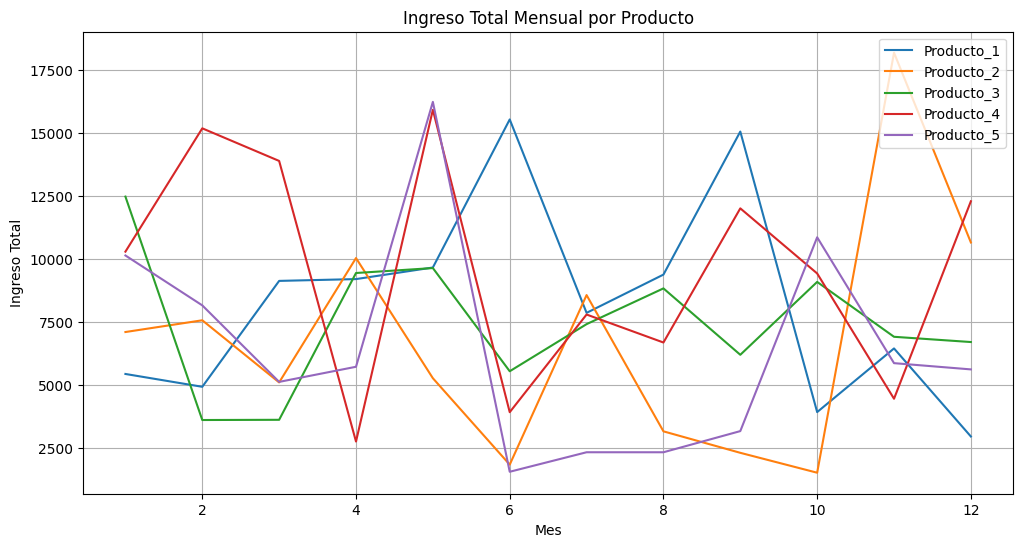

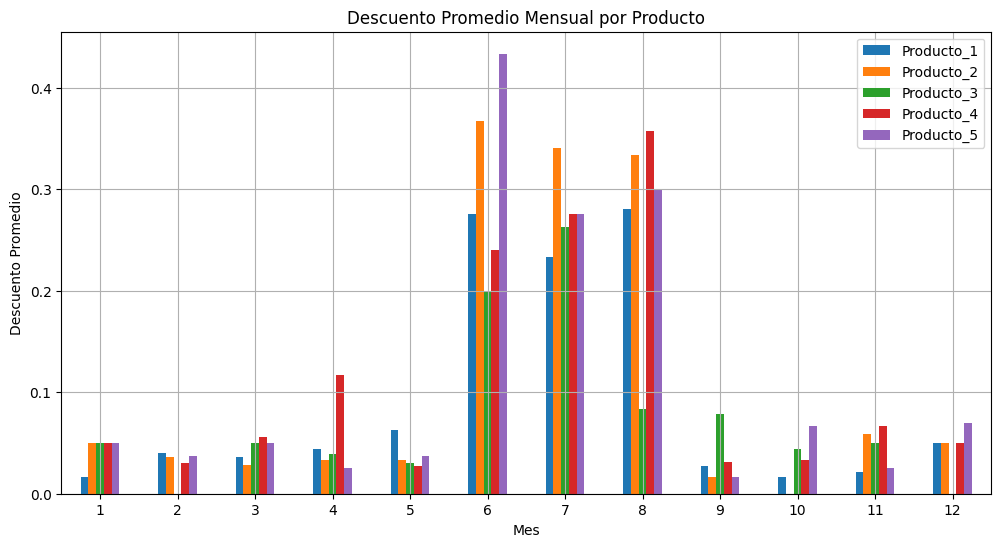

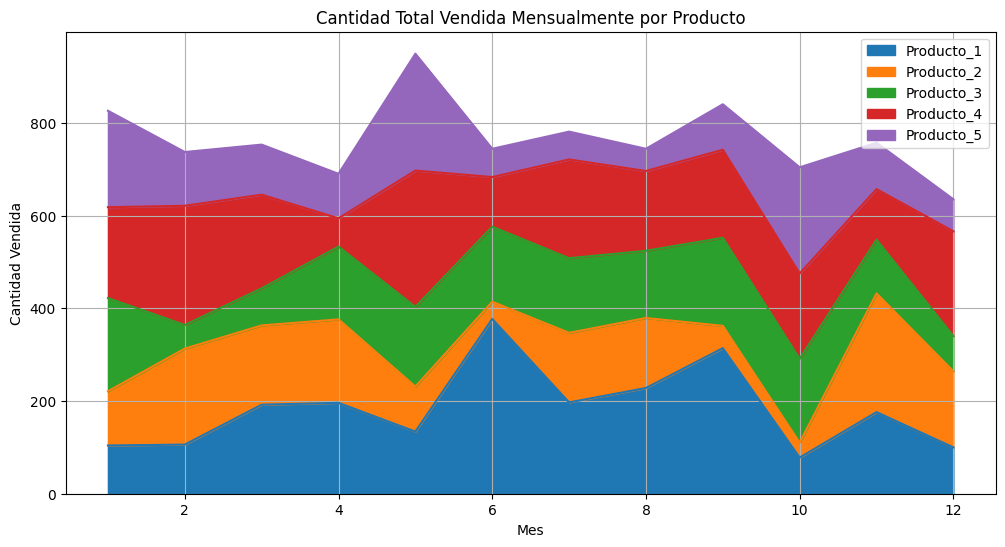

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Generación de Datos Simulados
np.random.seed(42)  # Para reproducibilidad
num_dias = 365
num_productos = 5
productos = [f'Producto_{i}' for i in range(1, num_productos + 1)]
fechas = pd.date_range('2024-01-01', periods=num_dias, freq='D')

data = {
    'ID_Producto': np.random.choice(productos, num_dias),
    'Fecha': fechas,
    'Cantidad_Vendida': np.random.randint(1, 50, num_dias),
    'Precio_Unitario': np.random.uniform(10, 100, num_dias)
}
df = pd.DataFrame(data)

# Simular descuentos estacionales
def asignar_descuento(fecha):
    mes = fecha.month
    if 6 <= mes <= 8:  # Verano
        return np.random.choice([0, 0.1, 0.2, 0.3, 0.4, 0.5], p=[0.1, 0.1, 0.2, 0.3, 0.2, 0.1])
    elif 12 <= mes <= 2:  # Invierno
        return np.random.choice([0, 0.05, 0.1], p=[0.7, 0.2, 0.1])
    else:  # Primavera/Otoño
        return np.random.choice([0, 0.05, 0.1, 0.15], p=[0.5, 0.3, 0.1, 0.1])

df['Descuento'] = df['Fecha'].apply(asignar_descuento)
df['Precio_Venta'] = df['Precio_Unitario'] * (1 - df['Descuento'])
df['Ingreso_Total'] = df['Cantidad_Vendida'] * df['Precio_Venta']

# 2. Análisis con Pandas
df['Mes'] = df['Fecha'].dt.month
ventas_mensuales = df.groupby(['Mes', 'ID_Producto'])['Ingreso_Total'].sum().unstack()
descuento_promedio = df.groupby(['Mes', 'ID_Producto'])['Descuento'].mean().unstack()
cantidad_vendida = df.groupby(['Mes', 'ID_Producto'])['Cantidad_Vendida'].sum().unstack()

# 3. Visualización con Matplotlib

# Gráfico 1: Ingreso Total Mensual por Producto
plt.figure(figsize=(12, 6))
for producto in productos:
    plt.plot(ventas_mensuales.index, ventas_mensuales[producto], label=producto)
plt.title('Ingreso Total Mensual por Producto')
plt.xlabel('Mes')
plt.ylabel('Ingreso Total')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 2: Descuento Promedio Mensual por Producto
descuento_promedio.plot(kind='bar', figsize=(12, 6))
plt.title('Descuento Promedio Mensual por Producto')
plt.xlabel('Mes')
plt.ylabel('Descuento Promedio')
plt.xticks(rotation=0)  # Rota las etiquetas del eje x para que sean legibles
plt.legend()
plt.grid(True)
plt.show()


# Gráfico 3: Cantidad Vendida Mensualmente por Producto
cantidad_vendida.plot(kind='area', figsize=(12, 6), stacked=True)
plt.title('Cantidad Total Vendida Mensualmente por Producto')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.grid(True)
plt.show()